### Polar TimeSeries Animation

*M8 Bottom Temps*

see following links:
https://www.climate-lab-book.ac.uk/spirals/  
http://blogs.reading.ac.uk/climate-lab-book/files/2016/06/spiral_2017_large-1.gif

try as doy daily averages (not monthly averages)

Adapted from Ed Hawkins at Climate Lab Book.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv('data/M8_bottomtemp.csv',parse_dates=True,index_col='date')

In [26]:
df.max()

                
 T_20     3.9562
 index     60624
dtype: object

In [27]:
df[df[' T_20']>20]=np.nan

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'2 Deg C'),
 Text(0,0,''),
 Text(0,0,'')]

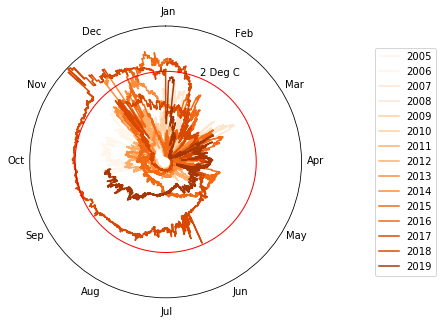

In [29]:
dfg = df.groupby(df.index.year)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='polar')

color_range = ['#fff5eb','#fff5eb','#fee6ce','#fee6ce','#fdd0a2',
               '#fdd0a2','#fdae6b','#fdae6b','#fd8d3c','#fd8d3c',
               '#f16913','#f16913','#d94801','#d94801','#a63603',
               '#a63603','#7f2704','#7f2704',]
color_range = color_range[::-1]
for year in dfg.groups:
    ax.plot(np.deg2rad((dfg.get_group(year).index.dayofyear/365*360)),
              dfg.get_group(year)[' T_20'],color=color_range[2004-year],label=year)
doy_ticks = np.deg2rad(((np.array([1,32,60,91,121,152,182,213,244,274,305,335]))/365*360))

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax.plot(np.deg2rad(np.arange(0,360,1)),np.arange(0,360,1)*0+2,linewidth=1,color='r')
ax.set_ylim([-2,4])
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N', offset=0)
plt.grid(False,which='both')
ax.set_xticks(doy_ticks)
ax.set_xticks(doy_ticks)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'])
ax.set_yticklabels(['','','','2 Deg C','','',''])

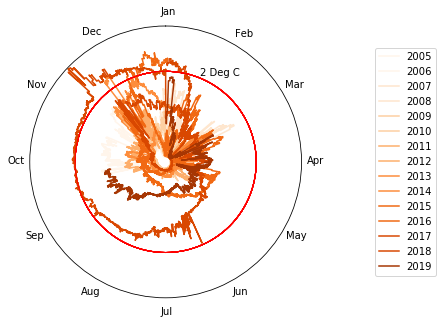

In [197]:
# movie
dfg = df.groupby(df.index.year)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='polar')

color_range = ['#fff5eb','#fff5eb','#fee6ce','#fee6ce','#fdd0a2',
               '#fdd0a2','#fdae6b','#fdae6b','#fd8d3c','#fd8d3c',
               '#f16913','#f16913','#d94801','#d94801','#a63603',
               '#a63603','#7f2704','#7f2704',]
color_range = color_range[::-1]
for year in dfg.groups:
    for month in range(1,13,1):
        if month == 1:
            ax.plot(np.deg2rad((dfg.get_group(year)[dfg.get_group(year).index.month == month].index.dayofyear/365*360)),
                      dfg.get_group(year)[dfg.get_group(year).index.month == month][' T_20'],color=color_range[2004-year],label=year)

            doy_ticks = np.deg2rad(((np.array([1,32,60,91,121,152,182,213,244,274,305,335]))/365*360))

            ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
            ax.plot(np.deg2rad(np.arange(0,360,1)),np.arange(0,360,1)*0+2,linewidth=1,color='r')
            ax.set_ylim([-2,4])
            ax.set_theta_direction(-1)
            ax.set_theta_zero_location('N', offset=0)
            plt.grid(False,which='both')
            ax.set_xticks(doy_ticks)
            ax.set_xticks(doy_ticks)
            ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'])
            ax.set_yticklabels(['','','','2 Deg C','','',''])
        else:
            ax.plot(np.deg2rad((dfg.get_group(year)[dfg.get_group(year).index.month == month].index.dayofyear/365*360)),
                      dfg.get_group(year)[dfg.get_group(year).index.month == month][' T_20'],color=color_range[2004-year],label='')
        
        fig.savefig('M8polar_'+str(year)+str(month).zfill(2)+'.png',dpi=100)

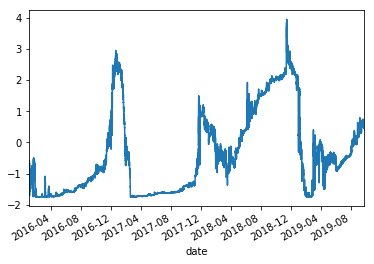

In [30]:
df[' T_20']['2016':'2019'].plot()